In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Daily TSLA index for 10 years from 2013
# https://www.nasdaq.com/market-activity/index/tsla/historical  < NO! DOES NOT INC SPLIT ADJUSTED CLOSE! USE YAHOO!
# https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Select max date range and download csv file
csv_file = '../data/tsla_HistoricalData.csv'

df = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Adj Close'])
df.head()

,Date,Adj Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [55]:
df.rename(columns={'Price': 'Pre-split Price'}, inplace=True)
df.rename(columns={'Adj Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Price
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [56]:
csv_file = '../data/tsla_ArkInvestTarget.csv'
dforecast = pd.read_csv(csv_file)
dforecast['Date'] = pd.to_datetime(dforecast['TargetDate'],dayfirst=True)
dforecast.set_index('Date', inplace=True)
# split forward forecast from the main base lines (where ArkBear is NaN)
dforecastProjection = dforecast[dforecast['ForecastDate']=='14/04/2022']
dforecast = dforecast[dforecast['ArkBear'].notna()]
dforecast = dforecast.sort_index()
dforecastProjection.head()


,ArkInvest,ArkBear,ArkBase,ArkBull,ForecastDate,TargetDate,Note
Date,,,,,,,
2026-06-01,2026,966.666667,1533.333333,1933.333333,14/04/2022,1/06/2026,"added bitcoin, increased robotaxi"
2027-06-01,2027,NaN,2666.666667,NaN,14/04/2022,1/06/2027,forward forecast published with 2026 target
2028-06-01,2028,NaN,4666.666667,NaN,14/04/2022,1/06/2028,forward forecast published with 2026 target
2029-06-01,2029,NaN,6333.333333,NaN,14/04/2022,1/06/2029,forward forecast published with 2026 target
2030-06-01,2030,NaN,7500.000000,NaN,14/04/2022,1/06/2030,forward forecast published with 2026 target


In [57]:
csv_file = '../data/tsla_OtherTarget.csv'
dfOther = pd.read_csv(csv_file)
dfOther['Date'] = pd.to_datetime(dfOther['TargetDate'],dayfirst=True)
dfOther['ForecastDate'] = pd.to_datetime(dfOther['ForecastDate'],dayfirst=True)
dfOther.set_index('Date', inplace=True)
dfOther = dfOther.sort_index()
print(dfOther.columns)
#grouped = dfOther.groupby(['Source','ForecastDate'])

Index(['Year', 'Source', 'Bear', 'Base', 'Bull', 'ForecastDate', 'TargetDate',
       'Note'],
      dtype='object')


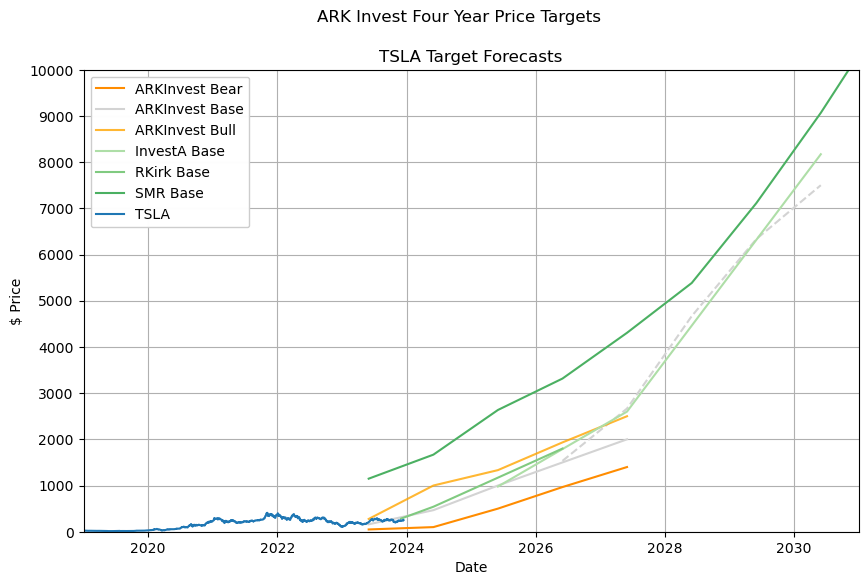

In [58]:
import matplotlib.cm as cm
import numpy as np
plt.figure(figsize=(10, 6))
grouped = dfOther.groupby('Source')
colorGreen = plt.cm.Greens(np.linspace(0.2, 0.6, len(grouped)))
colorOrange = plt.cm.Oranges(np.linspace(0.2, 0.6, len(grouped)))

# ARK has multiple forward projections on this date and I want this as a forked dashed line
# to indicate that this was a continuation of a forecast
# This is temporary until I can find a better way to plot muliple projections from one source
forecast_date = pd.to_datetime('2022-04-14')  

for (source, group), colorGreen in zip(grouped, colorGreen):
    if group['Bear'].notna().any():  # Check if the group has any non-null values
        plt.plot(group.index, group['Bear'], label=source+' Bear', color='darkorange')

    if source == 'ARKInvest':
        baseColor = 'lightgrey'
    else:
        baseColor = colorGreen
    subgroup = group[group['ForecastDate'] == forecast_date]
    if not subgroup.empty:      
        plt.plot(subgroup.index, subgroup['Base'], color=baseColor, linestyle='--')
    subgroup = group[group['ForecastDate'] != forecast_date]
    if not subgroup.empty:      
        plt.plot(subgroup.index, subgroup['Base'], label=source+' Base', color=baseColor)

    if group['Bull'].notna().any():  # Check if the group has any non-null values
        plt.plot(group.index, group['Bull'], label=source+ ' Bull', color='orange', alpha=0.8)


colors = list(plt.rcParams['axes.prop_cycle'])
plt.plot(df.index, df['Price'], color=colors[0]['color'], label='TSLA')
plt.xlabel('Date')
plt.ylabel('$ Price')
plt.suptitle('ARK Invest Four Year Price Targets')
plt.title('TSLA Target Forecasts')
plt.yticks(range(0, 100000, 1000))
plt.grid(True)
plt.ylim(bottom=0, top=10000) 
plt.xlim(left=pd.to_datetime('2019-01-01'), right=pd.to_datetime('2031-01-01'))
#plt.yscale('linear')
legend = plt.legend(loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()

### Disclaimer

Not financial advice: All content of this repository is for educational purposes only. No warranty or guarantee or forward looking statements of fit for purpose; do your own research, etc.